importar datos desde el DATASET y el libro de codigos que nos ayudará a limpiar variables.

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
file_path = 'dataset2.dta'
excel_file_path = 'Libro_de_codigos_Base_de_datos_Casen_2022(18marzo2024)(1).xlsx'
data = pd.read_stata(file_path, convert_categoricals=False)
data.shape

C:\Users\Seba\AppData\Local\Temp\ipykernel_288\1872172907.py:15: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  data = pd.read_stata(file_path, convert_categoricals=False)


(202231, 918)

eliminamos las filas con valores nulos o "0" en la variable dependiente

In [2]:
print("cantidad de datos antes del drop: ", data.shape[0])

data = data.dropna(subset=['ytrabajocor'])

# Eliminar filas con valores especiales en 'ytrabajocor'
valores_especiales = [-66, -88, -99]
data = data[~data['ytrabajocor'].isin(valores_especiales)]

print("cantidad de datos despues del drop: ", data.shape[0])
data.shape

cantidad de datos antes del drop:  202231
cantidad de datos despues del drop:  88976


(88976, 918)

# Limpieza de variables

Eliminacion de columnas con valores nulos mayor al 60%


In [3]:
umbral_nulos = 0.6
data = data.dropna(thresh=len(data) * (1 - umbral_nulos), axis=1)
data.shape

(88976, 495)

Eliminar columnas con tipo 'Timestamp' y tipo string

In [4]:
data = data.select_dtypes(exclude=['datetime', 'object'])


Definición y eliminación de lista de variables personalizadas a eliminar

In [5]:
# Lista de variables personalizadas a eliminar
variables_limpieza = ['','','os_presente','e6a_asiste','e6a_no_asiste','e6c_completo','activ','cotiza','v27a', 'v27b', 'v28', 'v29a','v13_propia', 'v13_arrendada', 'v13_cedida', 'v13b_1', 'v13b_2', 'v13b_3', 'v13b_4', 'v13b_5', 'v13b_6', 'v13b_7','asal','h5_1a', 'h5_1b', 'h5_20', 'h5_2', 'n_nucleos', 'nucleo','r8a', 'r8b', 'r8c', 'r8d', 'r8e', 'r8f', 'r8g', 'r8h', 'r9a','v18','expr','expr_osig','varstrat','varunit']  

# Cargar listas adicionales desde el archivo Excel
excel_file_path = 'Libro_de_codigos_Base_de_datos_Casen_2022(18marzo2024)(1).xlsx'
sheets = ['Y', 'Ing Cepal', 'Ing MDSF', 'HdR', 'PM', 'S', 'R', 'H']
for sheet in sheets:
    limpieza_variables = pd.read_excel(excel_file_path, sheet_name=sheet, usecols=[1], skiprows=2).iloc[:, 0].dropna().tolist()
    variables_limpieza += limpieza_variables
print(variables_limpieza)

# Variables a mantener
variables_mantener = ['sexo', 'ecivil', 'h7a', 'h7b', 'h7c', 'h7d', 'h7e', 'h7f', 'edad', 's13', 's16', 's28', 's27a', 's34a', 's34c', 'ytrabajocor', 'region', 'area']

# Eliminar variables a mantener de la lista de limpieza
for variable in variables_mantener:
    if variable in variables_limpieza:
        variables_limpieza.remove(variable)

# Eliminar variables personalizadas
data = data.drop(columns=variables_limpieza, errors='ignore')



['', '', 'os_presente', 'e6a_asiste', 'e6a_no_asiste', 'e6c_completo', 'activ', 'cotiza', 'v27a', 'v27b', 'v28', 'v29a', 'v13_propia', 'v13_arrendada', 'v13_cedida', 'v13b_1', 'v13b_2', 'v13b_3', 'v13b_4', 'v13b_5', 'v13b_6', 'v13b_7', 'asal', 'h5_1a', 'h5_1b', 'h5_20', 'h5_2', 'n_nucleos', 'nucleo', 'r8a', 'r8b', 'r8c', 'r8d', 'r8e', 'r8f', 'r8g', 'r8h', 'r9a', 'v18', 'expr', 'expr_osig', 'varstrat', 'varunit', 'y1', 'y2_dias', 'y2_hrs', 'y3a_preg', 'y3b_preg', 'y3c_preg', 'y3d_preg', 'y3e_preg', 'y3f_preg', 'y3a', 'y3ap', 'y3b', 'y3bp', 'y3c', 'y3cp', 'y3d', 'y3dp', 'y3e', 'y3ep', 'y3f_esp', 'y3f', 'y3fp', 'y4a_preg', 'y4b_preg', 'y4c_preg', 'y4d_preg', 'y4a', 'y4b', 'y4c', 'y4d_esp', 'y4d', 'y5a_preg', 'y5b_preg', 'y5c_preg', 'y5d_preg', 'y5e_preg', 'y5f_preg', 'y5g_preg', 'y5h_preg', 'y5i_preg', 'y5j_preg', 'y5k_preg', 'y5l_preg', 'y5a', 'y5b', 'y5c', 'y5d', 'y5e', 'y5f', 'y5g', 'y5h', 'y5i', 'y5j', 'y5k', 'y5l', 'y6', 'y7', 'y8', 'y9', 'y10', 'y11_preg', 'y11', 'y12a_preg', 'y12a'

Reemplazar valores especiales [-66, -88, -99] con NaN

In [6]:
valores_especiales = [-66, -88, -99]
data.replace(valores_especiales, np.nan, inplace=True)

Manejo de valores atípicos usando winsorización (capping)

In [7]:
def winsorize_series(series, low_quantile=0.05, high_quantile=0.95):
    lower_bound = series.quantile(low_quantile)
    upper_bound = series.quantile(high_quantile)
    series = series.clip(lower=lower_bound, upper=upper_bound)
    return series

data = data.apply(winsorize_series)
data.shape

(88976, 122)

Imputar valores faltantes con KNN

In [9]:
knn_imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(knn_imputer.fit_transform(data), columns=data.columns)

se normalizan los datos con valores entre 0 y 1

In [10]:
# Normalización de datos
ss = MinMaxScaler()
data = pd.DataFrame(ss.fit_transform(data_imputed), columns=data_imputed.columns)

# seleccion forward
X = se crea una nueva DataFrame X que contiene todas las columnas de data_scaled excepto ytrabajocor.  
y = se crea una Serie y que contiene solo la columna ytrabajocor de data_scaled.

In [11]:
# Separar variables dependientes e independientes
X = data.drop(columns=['ytrabajocor'])
y = data['ytrabajocor']

In [61]:
# Forward Feature Selection
selector_forward = SequentialFeatureSelector(LinearRegression(), n_features_to_select=15, direction='forward', scoring='r2')
selector_forward.fit(X, y)

# Transform data
X_selected_forward = selector_forward.transform(X)

# Add constant for regression
X_selected_forward_with_const = sm.add_constant(X_selected_forward)

# Fit the model
model_forward = sm.OLS(y, X_selected_forward_with_const).fit()




Print model summary


                            OLS Regression Results                            
Dep. Variable:            ytrabajocor   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     146.6
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        09:04:03   Log-Likelihood:                -60526.
No. Observations:                3970   AIC:                         1.211e+05
Df Residuals:                    3955   BIC:                         1.212e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.28e+07   3.22e+06     -3.969      0.0

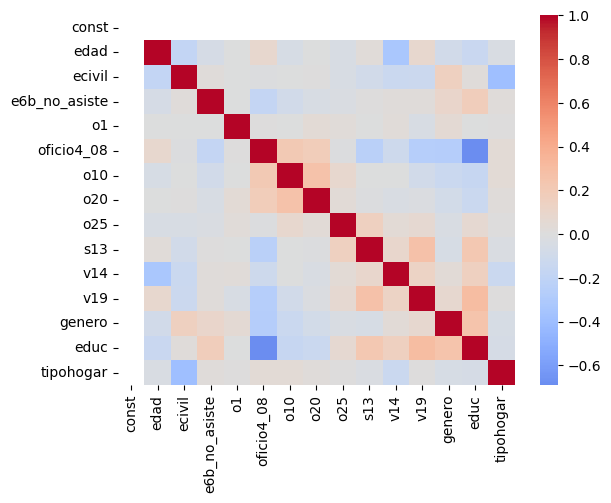

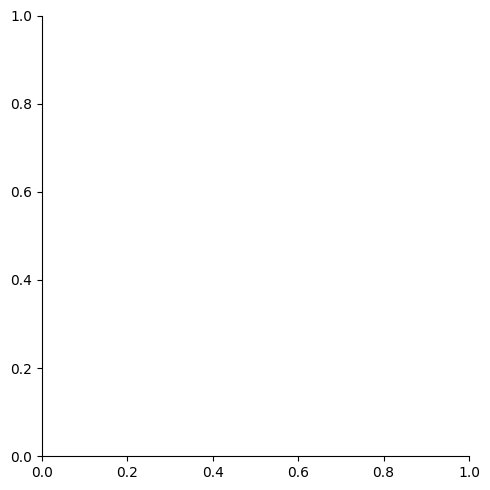

In [64]:
# Print model summary
print(model_forward.summary())

# Visualize the correlation matrix of selected features
selected_features_forward = X.columns[selector_forward.get_support()]
X_train_forward_df = pd.DataFrame(X_selected_forward, columns=selected_features_forward)

# Correlation heatmap
sns.heatmap(X_train_forward_df.corr(), annot=False, cmap='coolwarm', center=0)
plt.show()


Obtener e Imprimirlas características seleccionadas


In [63]:
from sklearn.model_selection import train_test_split

# Separar las variables independientes (X) y la variable dependiente (y)
X2 = data.drop(columns=['ytrabajocor'])
y2 = data['ytrabajocor']

# Añadir una constante para el término independiente en el modelo
X2 = sm.add_constant(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal múltiple
model_forward = sm.OLS(y_train, X_train).fit()

# Imprimir el resumen del modelo
print(model_forward.summary())

# Visualizar la matriz de correlación de las características seleccionadas
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [3970, 88976]

In [ ]:
selected_features_forward = X.columns[selector_forward.support_]
print("Variables seleccionadas (hacia adelante):", selected_features_forward)

Variables seleccionadas (hacia adelante): Index(['edad', 'ecivil', 'e6b_no_asiste', 'o1', 'oficio4_08', 'o10', 'o19',
       'o20', 'o25', 's13', 'v14', 'v19', 'genero', 'educ', 'tipohogar'],
      dtype='object')


Error cuadrático medio (MSE)
Coeficiente de determinación (R²)

In [ ]:
mse = mean_squared_error(y, model_forward.predict(X_selected_forward))
print("Error cuadrático medio (MSE):", mse)

r2 = r2_score(y, model_forward.predict(X_selected_forward))
print("Coeficiente de determinación (R²):", r2)

Error cuadrático medio (MSE): 0.027282822485588065
Coeficiente de determinación (R²): 0.5720788625297972


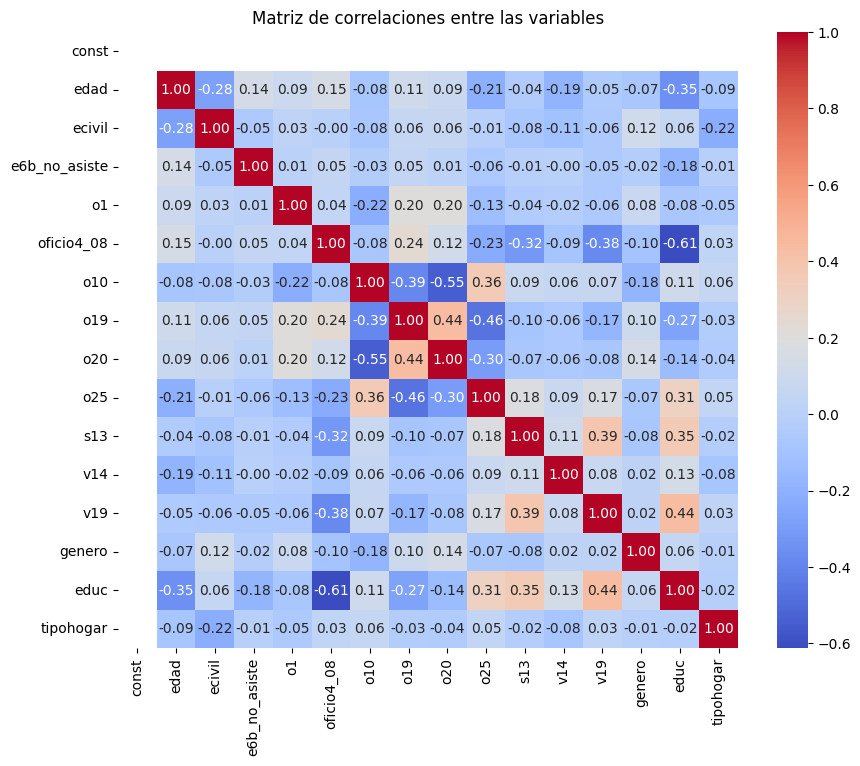

In [ ]:
correlation_matrix = X_train_forward_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaciones entre las variables")
plt.show()


In [ ]:
# Imprimir los coeficientes de regresión
print("Intercepto:", model_forward.params[0])
print("Coeficientes:")
for feature, coef in zip(selected_features_forward, model_forward.params[1:]):
    print(f"{feature}: {coef}")

# Función de regresión lineal múltiple
def regression_equation(model, feature_names):
    terms = [f"{coef:.4f} * {name}" for coef, name in zip(model.params[1:], feature_names)]
    return f"{model.params[0]:.4f} + " + " + ".join(terms)

# Mostrar la ecuación de regresión
equation = regression_equation(model_forward, selected_features_forward)
print("Ecuación de regresión lineal múltiple:")
print(equation)


Intercepto: 0.09989091278742991
Coeficientes:
edad: 0.06547958798563368
ecivil: -0.03692203895808094
e6b_no_asiste: 0.048703163609863716
o1: -0.04121427447433481
oficio4_08: -0.1041371459323861
o10: 0.12142174150911335
o19: -0.09097085720990584
o20: -0.04909351966516903
o25: 0.0868118889671409
s13: 0.13437202373169033
v14: 0.08583362449326276
v19: 0.18819239422523315
genero: -0.08856619533329523
educ: 0.15842825972509755
tipohogar: -0.05064257011859125
Ecuación de regresión lineal múltiple:
0.0999 + 0.0655 * edad + -0.0369 * ecivil + 0.0487 * e6b_no_asiste + -0.0412 * o1 + -0.1041 * oficio4_08 + 0.1214 * o10 + -0.0910 * o19 + -0.0491 * o20 + 0.0868 * o25 + 0.1344 * s13 + 0.0858 * v14 + 0.1882 * v19 + -0.0886 * genero + 0.1584 * educ + -0.0506 * tipohogar


C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:10: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  dataset_original = pd.read_stata(file_path, convert_categoricals=False)


Index(['edad', 'ecivil', 'e6b_no_asiste', 'o1', 'oficio4_08', 'o10', 'o19',
       'o20', 'o25', 's13', 'v14', 'v19', 'genero', 'educ', 'tipohogar',
       'ytrabajocor'],
      dtype='object')


C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')
C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')


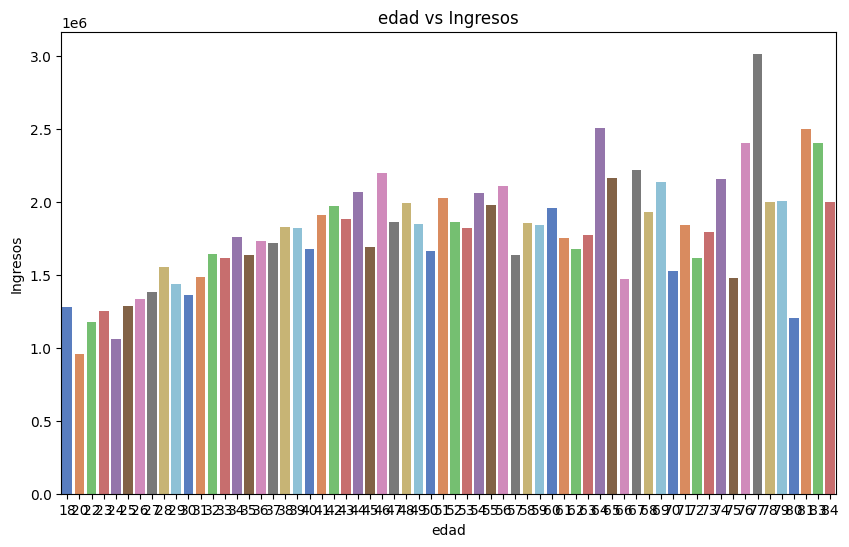

C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')
C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')


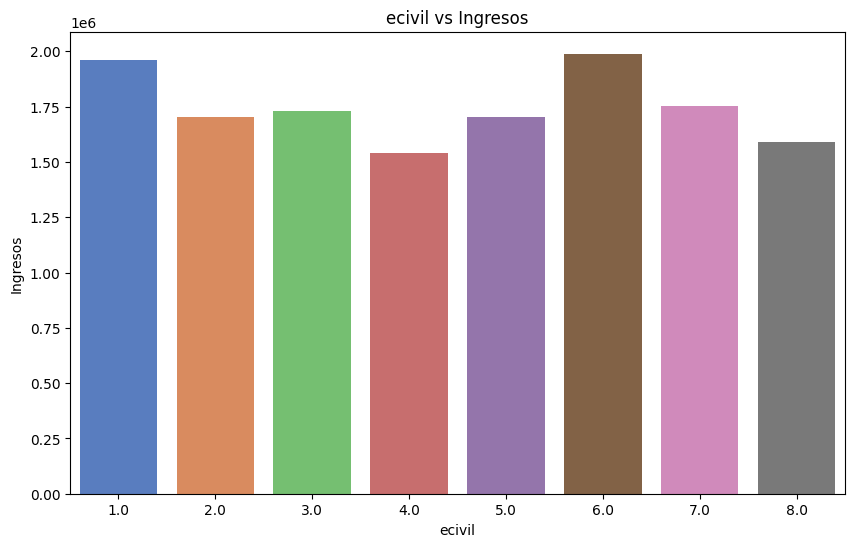

C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')
C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')


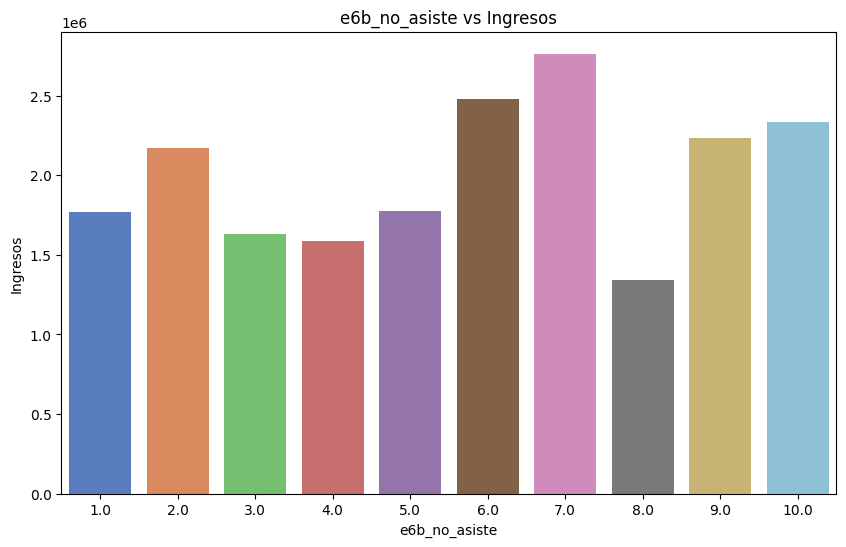

C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')
C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')


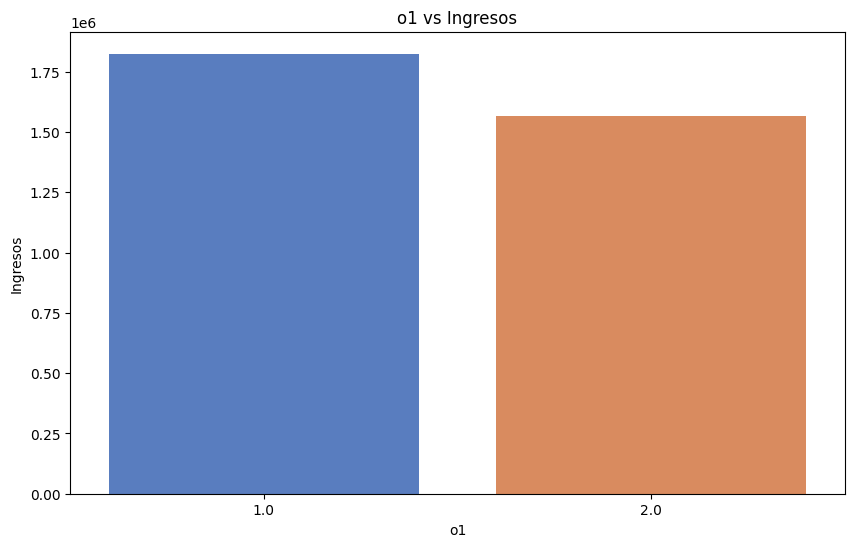

C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')
C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')


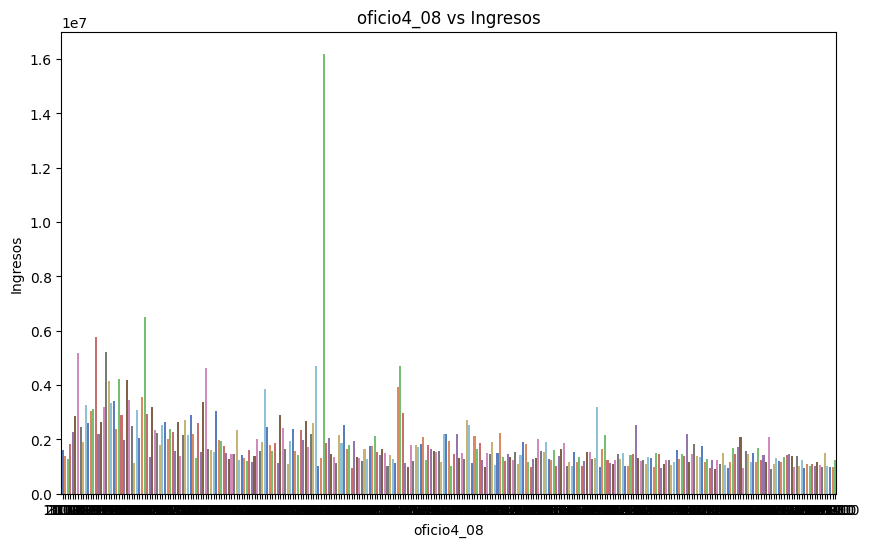

C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')
C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')


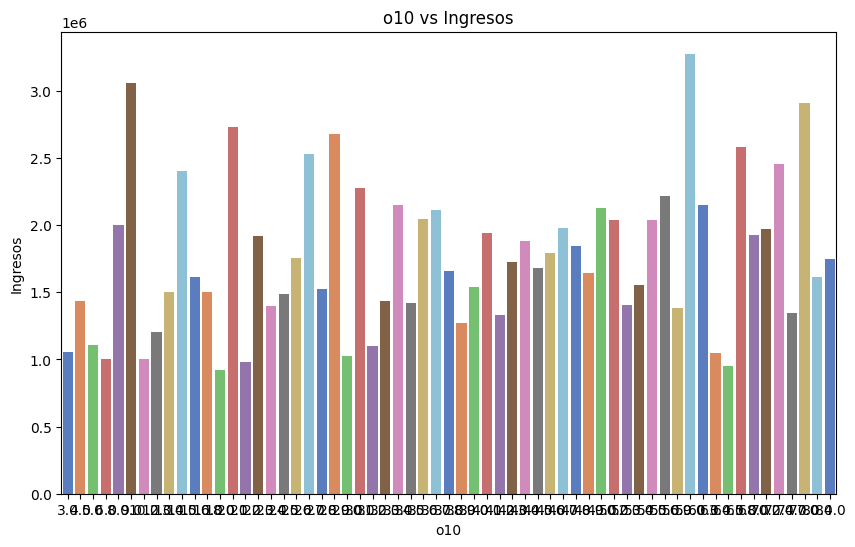

C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')
C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')


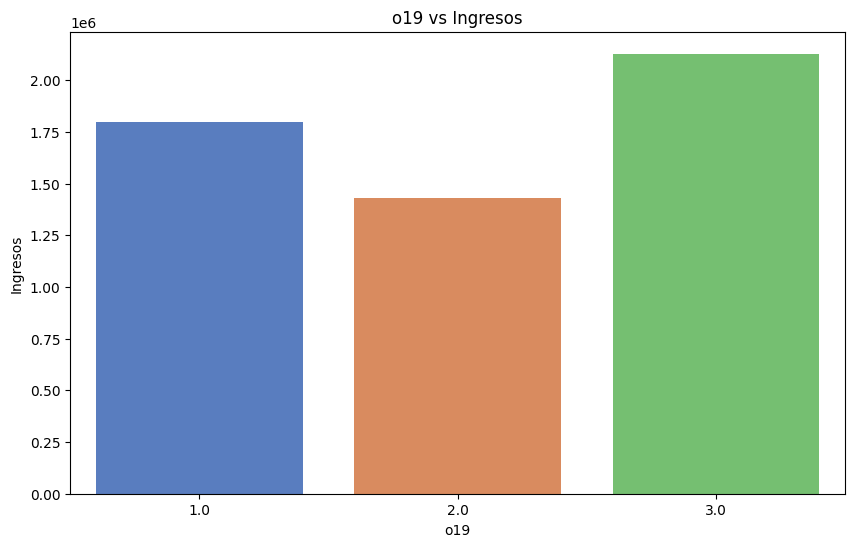

C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')
C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')


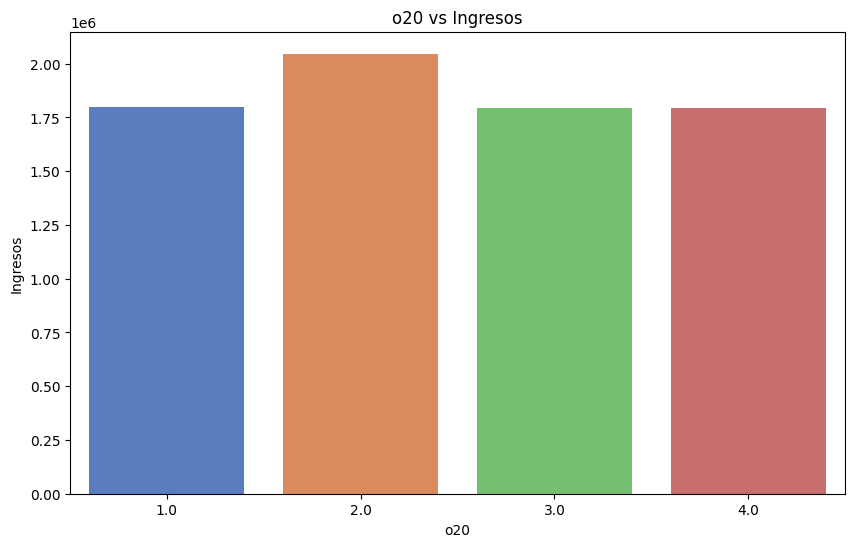

C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')
C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')


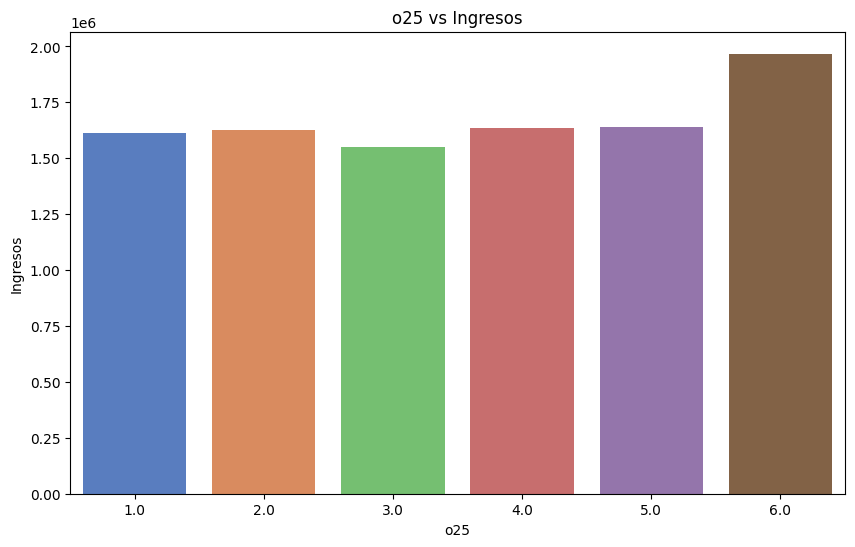

C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')
C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')


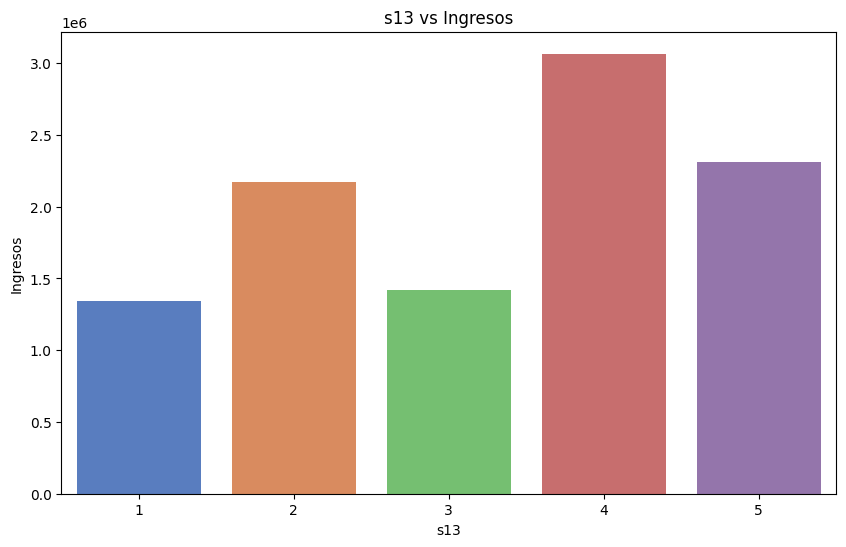

C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')
C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')


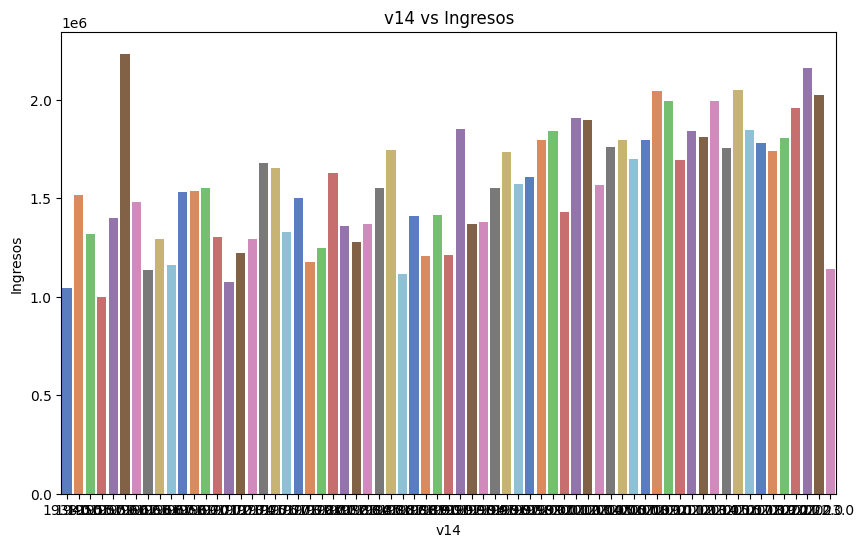

C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')
C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')


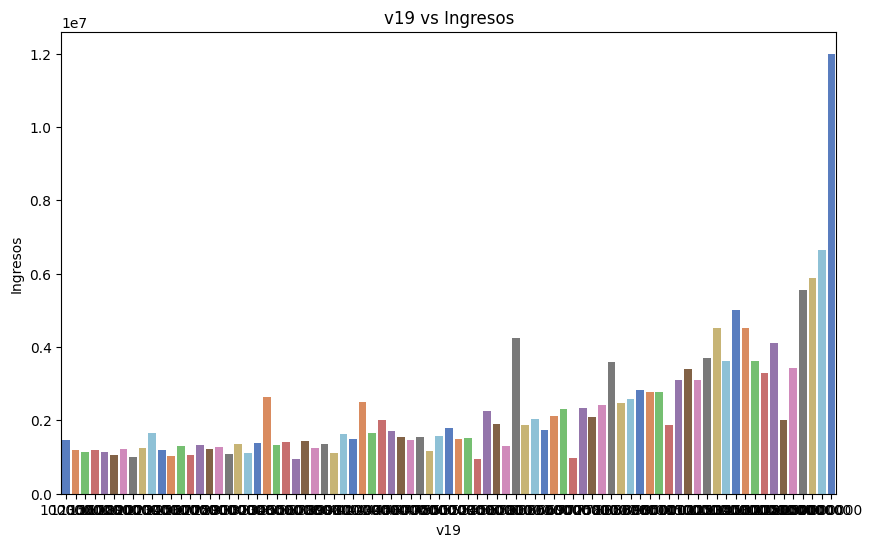

C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')
C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')


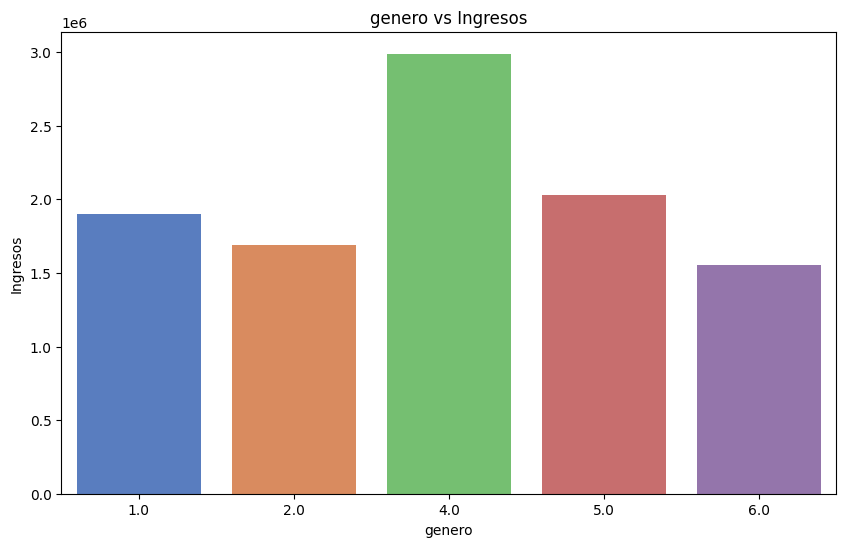

C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')
C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')


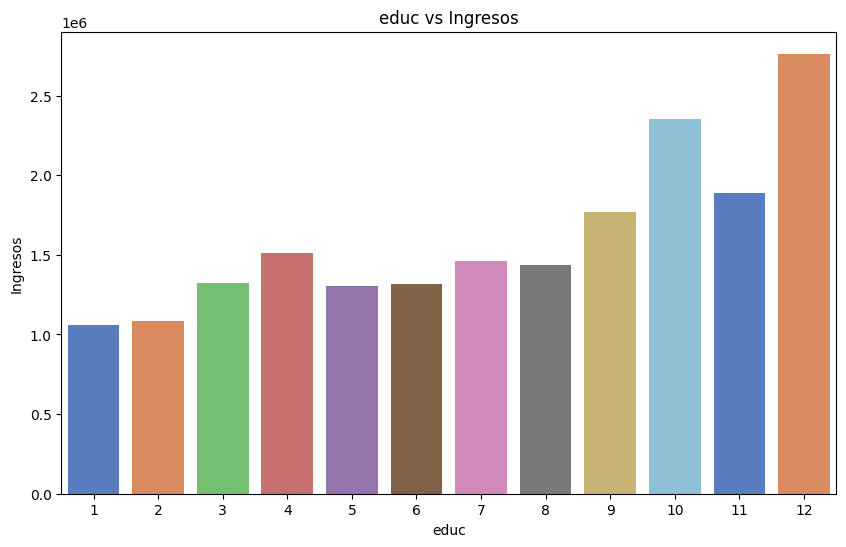

C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')
C:\Users\Seba\AppData\Local\Temp\ipykernel_288\106617634.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')


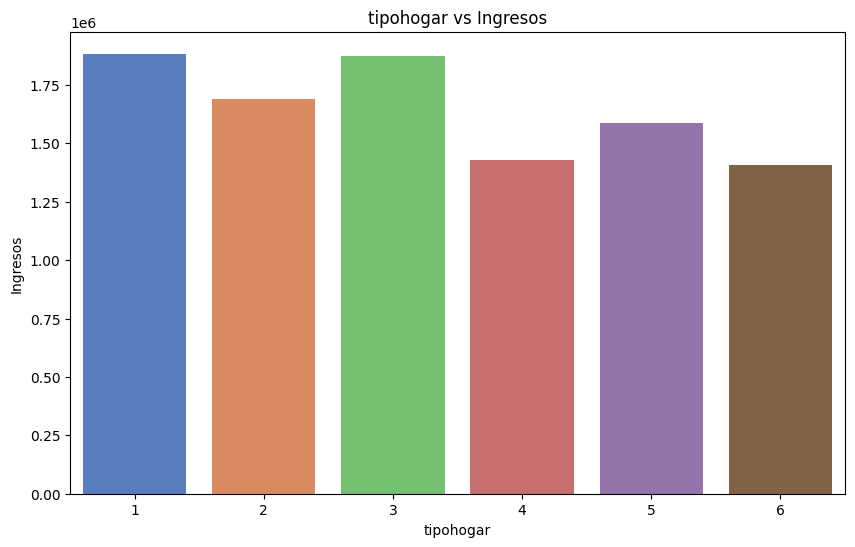

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Ruta al archivo de datos
file_path = 'dataset2.dta'

# Cargar el dataset original
dataset_original = pd.read_stata(file_path, convert_categoricals=False)

# Seleccionar las columnas coincidentes con las variables seleccionadas
columns_to_keep = selected_features_forward.tolist() + ['ytrabajocor']
data_selected = dataset_original[columns_to_keep].copy()

# Filtrar filas donde 'ytrabajocor' tiene valores mayores a 900000
data_selected_filtered = data_selected[data_selected['ytrabajocor'] > 900000]

# Eliminar filas con valores menores a 0 en las variables seleccionadas
data_selected_cleaned = data_selected_filtered[(data_selected_filtered >= 0).all(axis=1)]

print(data_selected_cleaned.columns)

# Crear gráficos por variable versus ingresos después de la limpieza
for feature in selected_features_forward:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='ytrabajocor', data=data_selected_cleaned, ci=None, palette='muted')
    plt.xlabel(feature)
    plt.ylabel('Ingresos')
    plt.title(f'{feature} vs Ingresos')
    plt.show()
